In [1]:
% matplotlib inline

import numpy as np
import pandas as pd
import matplotlib

In [2]:
matplotlib.rcParams['figure.figsize'] = 12, 6

In [3]:
df = pd.read_json("results/data-2019-08-22.json")

In [4]:
df.sample(n=20, random_state=42)

,duration,i,ms,name,qps
141697,24165751112,45493.0,4549.300000,create,10000
175808,19936024016,29603.0,2960.300000,read,10000
228842,369101311,32636.0,3263.600000,update,10000
282099,39435999958,35892.0,3589.200000,delete,10000
148766,8183884962,2561.0,256.100000,read,10000
35964,5386137513,6424.0,1927.392739,create,3333
226586,475539523,30380.0,3038.000000,update,10000
226633,473663151,30427.0,3042.700000,update,10000
101860,14008878288,5656.0,565.600000,create,10000
109580,14217610377,13376.0,1337.600000,create,10000


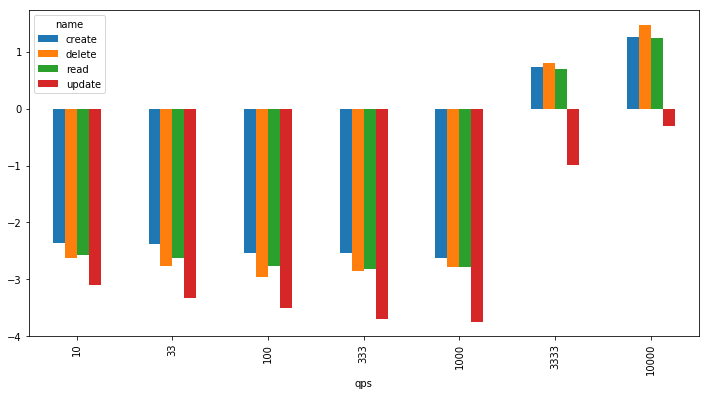

In [5]:
data = df[~df['name'].str.contains('Map') & (df['ms'] >= 1000) & (df['ms'] <= 4000)].groupby(['name', 'qps'])['duration'].mean().unstack().T
data.apply(np.log10).apply(lambda x: x - 9.).plot.bar()

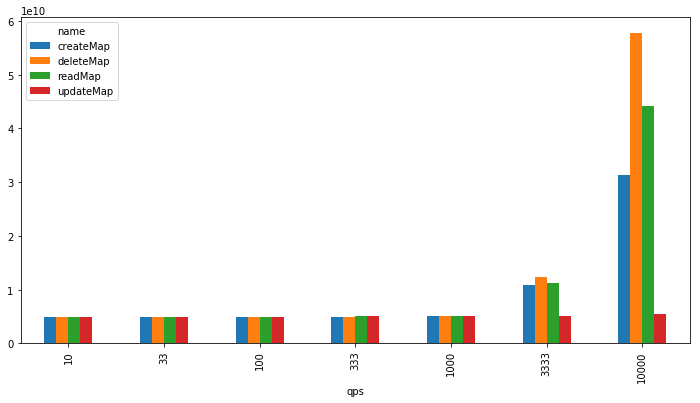

In [6]:
data = df[df['name'].str.contains('Map')].groupby(['name', 'qps'])['duration'].mean().unstack().T
data.plot.bar()

In [7]:
data = df[df['name'].str.contains('read')].groupby(['name', 'qps'])['duration'].mean().unstack().T
data

name,read,readMap
qps,,
10,3.078826e+06,4.904114e+09
33,2.446885e+06,4.975042e+09
100,1.665275e+06,4.998761e+09
333,1.509037e+06,5.008579e+09
1000,1.849980e+06,5.022172e+09
3333,5.061691e+09,1.125862e+10
10000,1.844436e+10,4.421048e+10
